<a href="https://colab.research.google.com/github/frios2020/Financial-Credit/blob/master/Project_1_Data_Mining_Summer_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - AiF360 Toolkit

NJIT Data Science Program<br>
Course<br>
CS634 Data Mining - Summer 2020<br>

Instructor<br>
Pantelis Monogioudis, Ph.D Professor of Practice, NJIT & Adjunct NYU<br>

Teaching Assistant<br>
Michael Lam (PhD student)<br>

Students:<br>
Fernando Rios<br>
Hassan Ouanir<br>
Ian Kavuma<br>

#What is AIF360 Toolkit?
<br>AIF360 toolkit is an open source library that was developed by the research community its purpose is to help with bias detection in datasets and models and be able to mitigate algorithmic bias in machine learning models and datasets. The toolkit’s design is an end-to-end workflow that is easy to use and the ability for users to build on it for their on case. AIF 360 is python package that delivers a comprehensive set of fairness metrics, explanations for these metrics, and algorithms to mitigate bias in datasets and models.</br>
<br>
Before explaining parts and how AIF360 works, we need to set some terminology and definitions.</br>
# Terminology:
* Privileged group: A group with systematic advantage
* Unprivileged group: A group with systematic disadvantage
* Bias: A systematic error, favoring an outcome over another, in here we concerned with unwanted bias that favors privileged group over unprivileged group
* Fairness metric: A quantification of unwanted bias in datasets or models
* Favorable label: A label that gives an advantage to the recipient. Examples are receiving loan, hired for a job or getting arrested
* Protected attribute: An attribute that divides a population into groups evenly when it comes to benefits received.
* Privileged value: Indicates a group with historical advantage.
* Group Fairness: The goal of groups defined by protected attributes receiving similar treatments or outcomes
* individual Fairness: The goal of similar individuals receiving similar treatments.
<br>
Now we move on to explaining the steps of AIF360 pipeline and how it works. The toolkit is structured like the usual Machine Learning pipelines. We get raw data coming in and it is loaded for use as CSV or pandas DATAFRAME. Once it is loaded, preprocessing takes place. Only then that the data is ready for training. There are three stages where fairness takes place. Fair pre-processing stage, during this stage before applying classifiers, the fair preprocessor is applied right after learning took place that transforms data to a fair data to be used for predictions. The fair in-processing is stage where the fairness is applied with the classifier itself to make the classifier fair while handling the learned dataset. Yet another stage is making sure that fairness is all over the structure, the toolkit has post-preprocessing fairness which is applied to the predicted dataset to make sure the output is fair. Below is the diagram illustrating the inner works of the pipeline.<br>

  ![alt text](https://drive.google.com/uc?export=view&id=1k57A5nU4sQrCYt5lYcvtA94ePtBlshsX)


<br>The rectangles are the new dataset that share the same protected attributes in the as the other datasets in the pipeline. The transitions are transformations that modify features or labels or both between their input and output. Trapezoids represent learned models that can be used to make predictions on test data. Some other stages are used to detect bias but not depicted in this picture.<br>

<br>Now we go into details of the pipeline, there are four classes that are associated with each stage of the pipeline and how all of the classes connect to make up the architecture of Fairness 360. The classes are:<br>
* Dataset class
* Metric class
* Explainer class
* Algorithm class
<br>

# Dataset Class:<br>
This class is where all the data is handled. Classifier learn from training datasets and predictions use the testing datasets. Once all that done, metrics are compared. Fairness is being applied at this stage associating protected attributes with each record in the data. Structured data is mostly handled in the Fairness 360, but unstructured can be accommodated. There two main classes that handles data here, StructuredDataset and BinaryLabelDataset if the user were to handle data first and reshape it. However, the toolkit comes with StandardDataset class that handles arbitrary raw data and applied standardization before use. This all happens at the left side of the diagram above.

# Metric Class:
This class and its subclasses compute various individual and group fairness metrics to check for bias in datasets and models. The metrics split into two categories
*Single dataset as input: The metrics used are Disparate impact and Statistical Parity Difference. Input after it is transformed or the original from dataset class comes in, the ratio and difference are computed for fairness measurement.
*Two datasets as input: Sample distortion metric and classifier metric, the first input is original or transformed dataset containing true label, the second input is the predicted dataset or fair predicted dataset respectively, containing predicted labels. This metric class tests fairness on models.

# Explainer Class:
This class is a go with metric class, it is intended to help provide more insight about computed fairness metrics that took place with the Metric Class. This class can help create meaningful explanations. It provides JSON prints as reports. Users are interested on finding how the metrics performed as report, such accuracy, count.

#Algorithmic Class:
Bias mitigation take place in this class. The mitigation happens by three different approach, modifying training data, the learning algorithm, or the predictions. These methods are called preprocessing, in-processing, and post-processing respectively. 

<br>* Preprocessing algorithms: </br>
Reweighing generates weights for training samples each (group, label) combinations differently to ensure fairness before classification. It uses probabilistic transformation that edits the features and label in data with group fairness.
<br>* In-processing algorithms:</br>
 Adversarial debiasing that does two jobs, maximize predictions accuracy while reducing an adversary’s ability to determine the protected attribute from the predictions. This how a fair classifier is obtained
<br>* Port-processing algorithms: </br>
 Equalized odds postprocessing, it changes output labels to maximize equalized odds. It does so, by solving a linear program that find probabilities. During this stage, a favorable outcome to privileged group is rejected and gives it to unprivileged group with some confidence band.

#Other thing the toolkit offers are:
* Maintenance of code code quality: To build on top of the AIF360 is easy if contributors want to contribut thier work to it or use it for thier on purpose and develop it more.
* Web appplication: The toolkit comes with back end service that allows the toolkit to be deployed to cloud and convert the fairness toolkit into a webservice for use by those interested in using for their application solutions




#Conclusion: 
Fairness 360 is a powerful open source library that enriches fairness research in AI/ML field and offers a baseline for practinioners of data science an easy to use techniques to detect and mitigate bias in thier application. 

# Related Work
 Many libraries have been developed and deal only with bias detection such as: Fairness Measures (Zehlike,2017), FairML (Adebayo,2016), FairTest (Tramer, 2017), Aequitas(Stevens,2018), and Themis(Galhotra 2017).
A handful of toolkits address both bias detection as well as bias mitigation, some of them are: Themis-ML(Bantilan,2018), Fairness Comparison (Friedler,2018).
AIF360 unify these efforts and bring together in one open source toolkit. 


# Question 2 Using Reweighing algorithm

## Installing Package

In [1]:
! pip install aif360

     |████████████████████████████████| 174kB 2.7MB/s 


In [2]:
#Loading data file just in case it is missing 
!wget -O ../usr/local/lib/python3.6/dist-packages/aif360/data/raw/german/german.data https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

--2020-06-30 23:53:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘../usr/local/lib/python3.6/dist-packages/aif360/data/raw/german/german.data’

../usr/local/lib/py 100%[===================>]  77.92K  --.-KB/s    in 0.1s    

2020-06-30 23:53:49 (616 KB/s) - ‘../usr/local/lib/python3.6/dist-packages/aif360/data/raw/german/german.data’ saved [79793/79793]



## Importing Statements

In [3]:
import sys
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from aif360.datasets import BinaryLabelDataset
from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector
from aif360.algorithms.preprocessing.optim_preproc import OptimPreproc
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_german
from aif360.algorithms.preprocessing.optim_preproc_helpers.distortion_functions import get_distortion_german
from aif360.algorithms.preprocessing.optim_preproc_helpers.opt_tools import OptTools
from aif360.algorithms.preprocessing.reweighing import Reweighing
from aif360.algorithms.preprocessing import DisparateImpactRemover

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
# Explainers
from aif360.explainers import MetricTextExplainer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading dataset, and splitting train and test dataset

In [4]:
# This dataset also contains protected attribute for "sex" which we do not consider in this evaluation
# age >=25 is considered privileged
# ignore sex-related attributes
dataset_orig = GermanDataset(protected_attribute_names=['age'],privileged_classes=[lambda x: x >= 25],features_to_drop=['personal_status', 'sex'] )   
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]


## Train dataset

In [5]:
## Step 3 Computing fairness metric on original training dataset
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.169905


In [6]:
# Step 4 Mitigating bias by transforming the original dataset
RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

In [7]:
## Step 5 Computing fairness metric on transformed dataset
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


## Test dataset

In [8]:
## Step 3 Computing fairness metric on original test dataset
metric_orig_test = BinaryLabelDatasetMetric(dataset_orig_test,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.006313


In [9]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
dataset_transf_test = RW.fit_transform(dataset_orig_test)

In [10]:
## Step 5 Computing fairness metric on transformed dataset
metric_transf_test = BinaryLabelDatasetMetric(dataset_transf_test,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_test.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.000000


# Question 3 Using Optimized preprocessing algorithm

In [11]:
# Loading dataset and splitting train and test dataset
dxx = load_preproc_data_german(['age'])
dxx_train, dxx_test = dxx.split([0.7], shuffle=True)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

### Train dataset

In [12]:
# Computing fairness metric on original training dataset
metric_orig_train = BinaryLabelDatasetMetric(dxx_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.116725


In [13]:
# This section demonstrates the use of Optimized pre-processing algorithm for bias mitigation
optim_options = {
            "distortion_fun": get_distortion_german,
            "epsilon": 0.05,
            "clist": [0.99, 1.99, 2.99],
            "dlist": [.1, 0.05, 0]
        }

In [14]:
OP = OptimPreproc(OptTools, optim_options,unprivileged_groups = unprivileged_groups,privileged_groups = privileged_groups)

/usr/local/lib/python3.6/dist-packages/aif360/algorithms/preprocessing/optim_preproc.py:68: UserWarning: Privileged and unprivileged groups specified will not be used. The protected attributes are directly specified in the data preprocessing function. The current implementation automatically adjusts for discrimination across all groups. This can be changed by changing the optimization code.
  warn("Privileged and unprivileged groups specified will not be "


In [15]:
OP = OP.fit(dxx_train)

Optimized Preprocessing: Objective converged to 0.000000


In [16]:
dataset_transf_train1 = OP.transform(dxx_train, transform_Y = True)
dataset_transf_train1 = dxx_train.align_datasets(dataset_transf_train1)

In [17]:
# Computing fairnes metric on transformed dataset
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train1, 
                                         unprivileged_groups=unprivileged_groups,
                                         privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())
print("Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)")

assert np.abs(metric_transf_train.mean_difference()) < np.abs(metric_orig_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.035811
Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)


### Test dataset

In [18]:
# Computing fairness metric on original training dataset
metric_orig_test = BinaryLabelDatasetMetric(dxx_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.199417


In [19]:
OP = OptimPreproc(OptTools, optim_options,unprivileged_groups = unprivileged_groups,privileged_groups = privileged_groups)
OP = OP.fit(dxx_test)
dataset_transf_test1 = OP.transform(dxx_test, transform_Y = True)
dataset_transf_test1 = dxx_test.align_datasets(dataset_transf_test1)            

/usr/local/lib/python3.6/dist-packages/aif360/algorithms/preprocessing/optim_preproc.py:68: UserWarning: Privileged and unprivileged groups specified will not be used. The protected attributes are directly specified in the data preprocessing function. The current implementation automatically adjusts for discrimination across all groups. This can be changed by changing the optimization code.
  warn("Privileged and unprivileged groups specified will not be "


Optimized Preprocessing: Objective converged to 0.004215


In [20]:
# Computing fairnes metric on transformed dataset
metric_transf_test = BinaryLabelDatasetMetric(dataset_transf_test, 
                                         unprivileged_groups=unprivileged_groups,
                                         privileged_groups=privileged_groups)
display(Markdown("#### Transformed test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_test.mean_difference())
print("Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)")

assert np.abs(metric_transf_test.mean_difference()) < np.abs(metric_orig_test.mean_difference())

#### Transformed test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.000000
Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)


# Question 4 Comparing the Reweighting and Optimized Preprocessing Algorithms

In the context of fairness, we are concerned with unwanted bias that places privileged groups at a systematic advantage and unprivileged groups at a systematic disadvantage. A fairness metric is a quantification of unwanted bias in datasets.
To determine fairness in both questions 2 and 3 we used the "mean difference" metric, alias of “statistical parity difference” on the train and test datasets. This metric is calculated in this way:<br>
Pr(Y=1 | D=unprivileged)-Pr(Y=1 | D=privileged)<br>
<br>This formula is the difference in the probability of favorable outcomes between unprivileged and privileged groups. A value of 0 implies both groups have equal benefit, a value less than 0 implies higher benefit for the privileged group, and a value greater than 0 implies higher benefit for the unprivileged group.<br>
<br>In question 2 we applied this metric on the train and the test dataset obtaining the following results: -0.169905 for the train dataset and -0.006313 on the test dataset. These findings tell us that the train dataset has greater bias o benefit than the test dataset, in favor of privileged group. In the test dataset, bias is very small.<br> 
Now, to reduce this unwanted bias, we need to apply a procedure called bias mitigation algorithm. These algorithms attempt to improve the fairness metrics by modifying the training data, the learning algorithm, or the predictions.
<br>First in the question 2, we applied “Reweighing Algorithm” on train and, test dataset. This method takes a dataset and assigns a weight to each observation using conditional probabilities based on target labels and protected class membership. After applying the Reweighting Algorithm, we calculated the same fairness metric with the transformed train and test dataset , they both reached a value of 0.0000, meaning there is no bias.</br>
<br>In question 3, we applied another bias mitigation algorithm “Optimized Preprocessing”. This method learns a probabilistic transformation that edits the features and labels in the data with group fairness, individual distortion and data fidelity. This method needs more settings of parameters than Reweighting method. We noticed that this method is slower than Reweighting algorithm. After applying Optimized Preprocessing algorithm, we calculated the same fairness metric "mean difference" with the transformed train and test datasets, we got a value of 0.0000, meaning there is no bias.</br>
<br>However, getting the same result of fairness metric "mean difference" after bias mitigation equal to zero, does not tell us how much in terms of which method is better in mitigating bias with higher percentage success rate, so to find out we trained our model using Logistic Regression to determine the accuracy (see section “training unbiased models using Logistic Regression”). The test accuracy results are 0.753 for the Reweighting algorithm and a test accuracy result of 0.620 for the Optimized Preprocessing. These findings showed us that the Reweighing Algorithm has a better prediction over the Optimized Preprocessing Algorithm.</br>
<br>In the section below “Additional work - Understanding dataset biased”,  we further provided some graphics to show bias between privileged and unpriviledged groups neatly.</br>


# Additional work

## Training unbiased models using Logistic Regression


In [21]:
def training(dataset_transf_train,dataset_transf_test,type_mitigation):
  scale_orig = StandardScaler()
  X_train = scale_orig.fit_transform(dataset_transf_train.features)
  X_test = scale_orig.fit_transform(dataset_transf_test.features)
  y_train = dataset_transf_train.labels.ravel()
  y_test = dataset_transf_test.labels.ravel()
  lr = LogisticRegression(C=100,random_state=1,solver='lbfgs')
  lr.fit(X_train,y_train)
  y_pred=lr.predict(X_test)
  print('Test Accuracy: %.3f' % accuracy_score(y_test,y_pred), type_mitigation)
  
training(dataset_transf_train,dataset_transf_test,"Reweighing Algorithm")
training(dataset_transf_train1,dataset_transf_test1,"Optimized preprocessing Algorithm")


Test Accuracy: 0.753 Reweighing Algorithm
Test Accuracy: 0.620 Optimized preprocessing Algorithm


## Analyzing train dataset without AIF360 package - Disparate Impact

In [22]:
def to_dataframes(aif360_ds):
  X = pd.DataFrame(aif360_ds.features, columns=aif360_ds.feature_names)
  y = pd.DataFrame(aif360_ds.labels.ravel(), columns=aif360_ds.label_names)
  Xy = pd.concat([X,y],axis=1)
  return Xy

train_XY = to_dataframes(dataset_orig_train)

privil = len(train_XY.loc[train_XY['age']==1])
unprivil = len(train_XY.loc[train_XY['age']==0])

privil_fav = len(train_XY.loc[(train_XY['age']==1) & (train_XY['credit']==1)])
unprivil_fav = len(train_XY.loc[(train_XY['age']==0) & (train_XY['credit']==1)])

privil_nofav = len(train_XY.loc[(train_XY['age']==1) & (train_XY['credit']==2)])
unprivil_nofav = len(train_XY.loc[(train_XY['age']==0) & (train_XY['credit']==2)])

ratio_unpriv_fav = unprivil_fav / unprivil
ratio_priv_fav = privil_fav / privil

ratio_disparate_impact=(ratio_unpriv_fav/ratio_priv_fav)*100

print("privileged: {'age': 1}",privil," unprivileged: {'age': 0}",unprivil)
print("privileged_favorable:",privil_fav," unprivileged_favorable:",unprivil_fav)
print("Ratio Unprivileged Favorable:",ratio_unpriv_fav)
print("Ratio Privileged Favorable:",ratio_priv_fav)
print("Disparate Impact:",ratio_disparate_impact)


privileged: {'age': 1} 587  unprivileged: {'age': 0} 113
privileged_favorable: 427  unprivileged_favorable: 63
Ratio Unprivileged Favorable: 0.5575221238938053
Ratio Privileged Favorable: 0.727427597955707
Disparate Impact: 76.64297113013201


## Original Dataset Visualization

In [23]:
# Reading original dataset for a better understanding
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
data = pd.read_csv(url,names = names, delimiter=' ')
print("Dataframe size:",data.shape)
print("Variable Age: Mean ", data['age'].mean(), "Median: ",data['age'].median())
data.head()

Dataframe size: (1000, 21)
Variable Age: Mean  35.546 Median:  33.0


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


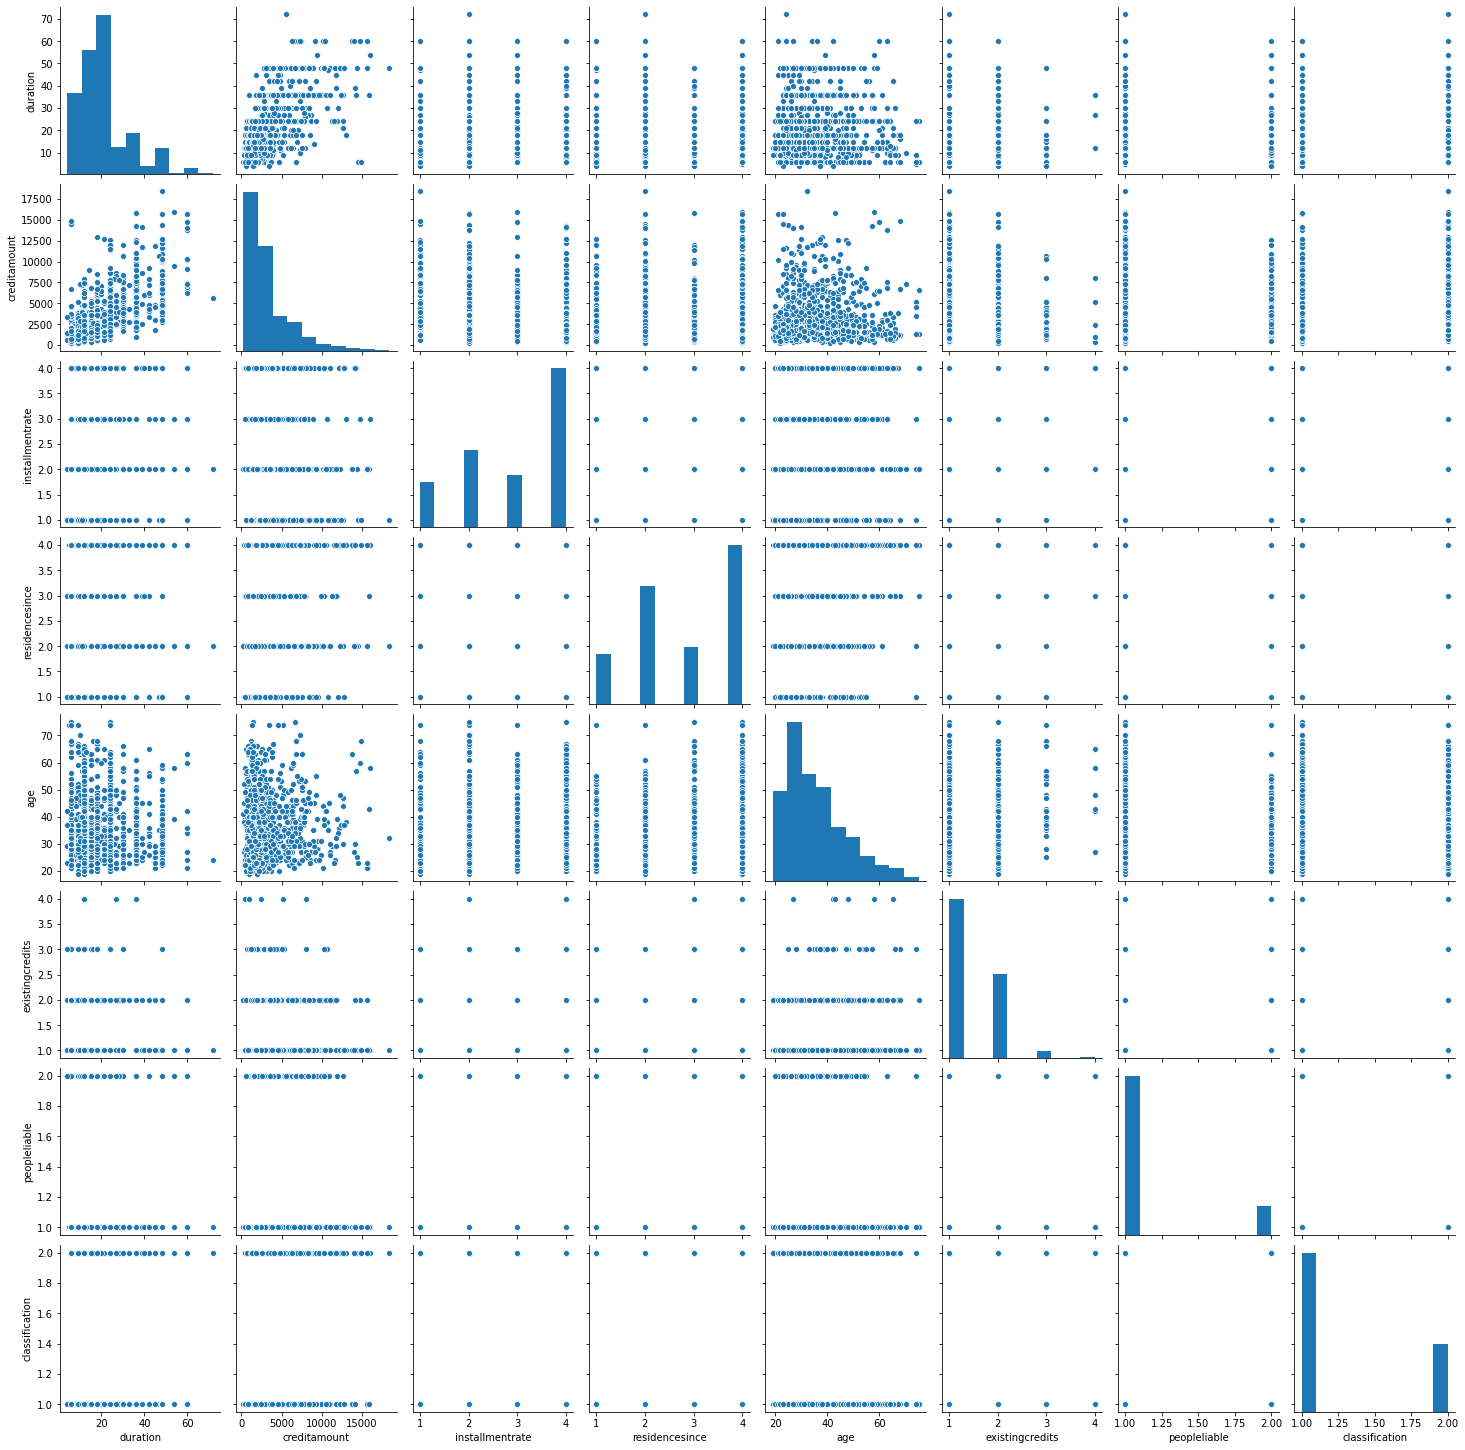

In [24]:
# Making a pairplot to visualize the distribution of single variables and relationships between variables
sns.pairplot(data)

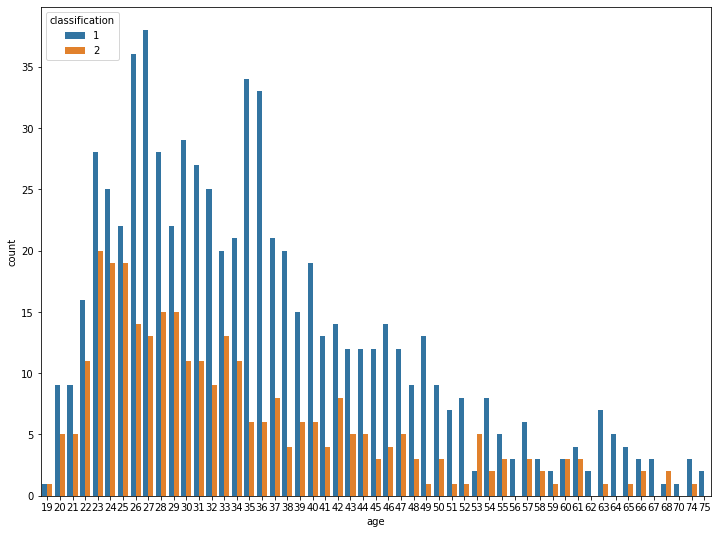

In [25]:
# Age by classification
plt.figure(figsize=(12,9))
sns.countplot(x='age', hue='classification',data=data)

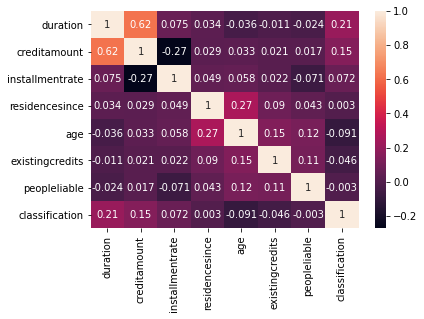

In [26]:
# Understanding correlation variables
sns.heatmap(data.corr(),annot= True)

## Understanding dataset biased

<Figure size 1440x288 with 0 Axes>

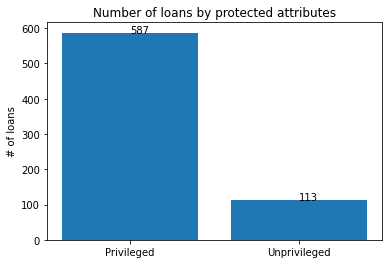

In [27]:

names = ['Privileged', 'Unprivileged']
values = [privil, unprivil]
plt.figure(figsize=(20, 4))
fig, ax =plt.subplots()
plt.bar(names, values)
plt.title('Number of loans by protected attributes')
ax.set_ylabel('# of loans')
for index, value in enumerate(values):
    plt.text(index, value, str(value))
plt.show()

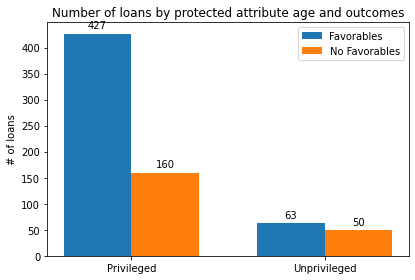

In [28]:
names = ['Privileged', 'Unprivileged']
favorables = [privil_fav, unprivil_fav]
nofavorables = [privil_nofav,unprivil_nofav]

x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, favorables, width, label='Favorables')
rects2 = ax.bar(x + width/2, nofavorables, width, label='No Favorables')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of loans')
ax.set_title('Number of loans by protected attribute age and outcomes')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
